In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns

In [2]:
data_path="supermarket_sales - Sheet1.csv"
data=pd.read_csv(data_path)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

data tidak ada yang kosong

In [1260]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

data tidak ada yang terduplikasi 

In [1261]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

data tidak ada yang kosong

In [1262]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


<AxesSubplot: title={'center': 'Kuantitas pembelian produk tiap gender'}, xlabel='Quantity', ylabel='Gender'>

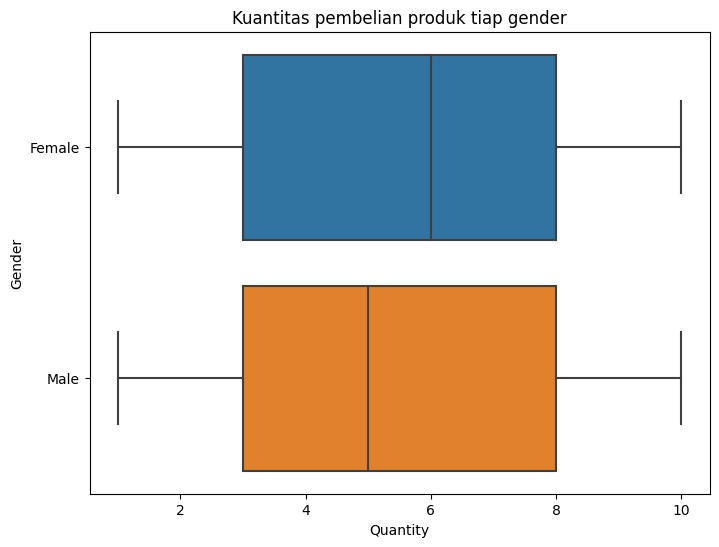

In [1263]:
# Mengatur ukuran frame
plt.figure(figsize=(8, 6))
plt.title("Kuantitas pembelian produk tiap gender")
sns.boxplot(x=data["Quantity"], y=data['Gender'])

In [1264]:
gender_counts = data.groupby(['Gender']).size().reset_index(name='counts')
print(gender_counts)

   Gender  counts
0  Female     501
1    Male     499


In [1265]:
gender_product_counts = data
# separate data by gender
male_data = gender_product_counts[gender_product_counts ['Gender'] == 'Male']
female_data = gender_product_counts[gender_product_counts ['Gender'] == 'Female']

In [1266]:
male_data.skew()

C:\Users\ACER\AppData\Local\Temp\ipykernel_12048\2615441834.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  male_data.skew()


Unit price                -0.009992
Quantity                   0.088608
Tax 5%                     0.963288
Total                      0.963288
cogs                       0.963288
gross margin percentage    0.000000
gross income               0.963288
Rating                     0.067608
dtype: float64

pria

In [1267]:
male_data[male_data["Branch"]=="A"].Quantity.sum()

950

In [1268]:
male_data[male_data["Branch"]=="B"].Quantity.sum()

909

In [1269]:
male_data[male_data["Branch"]=="C"].Quantity.sum()

782

wanita

In [1270]:
female_data[female_data["Branch"]=="A"].Quantity.sum()

909

In [1271]:
female_data[female_data["Branch"]=="B"].Quantity.sum()

911

In [1272]:
female_data[female_data["Branch"]=="C"].Quantity.sum()

1049

<Figure size 4000x4000 with 0 Axes>

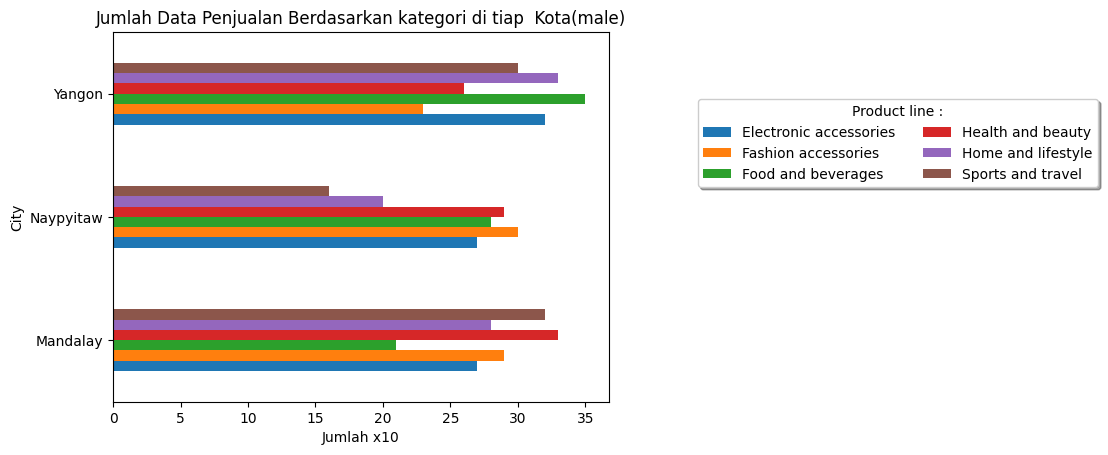

In [1273]:
city_product_counts = male_data.groupby(['City','Product line']).size().reset_index(name='counts')
plt.figure(figsize=(40,40))
city_product_counts.pivot(index='City', columns='Product line', values='counts').plot.barh()
plt.xlabel('Jumlah x10')
plt.legend(title = "Product line :",loc='right', bbox_to_anchor=(2, 0.7), shadow=True, ncol=2)
plt.title('Jumlah Data Penjualan Berdasarkan kategori di tiap  Kota(male)')
plt.show()

<Figure size 4000x4000 with 0 Axes>

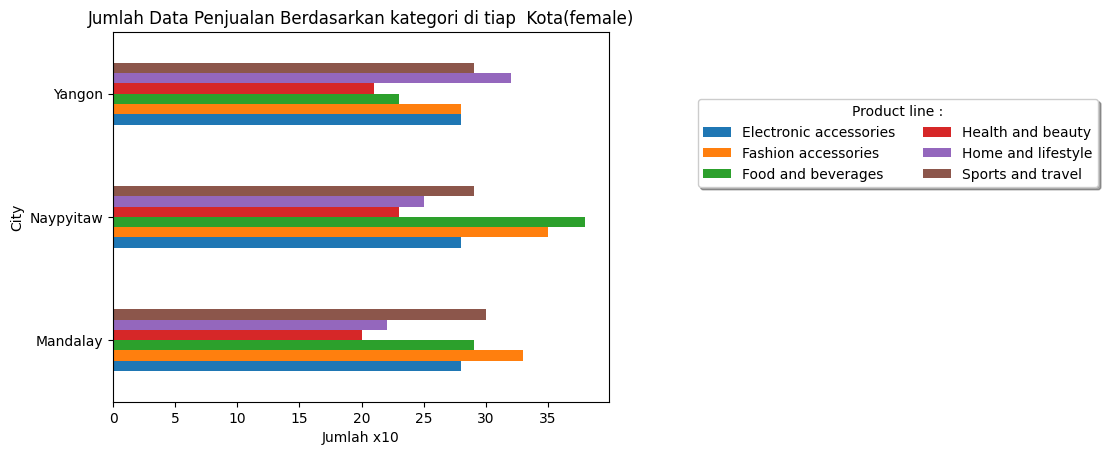

In [1274]:
city_product_counts = female_data.groupby(['City','Product line']).size().reset_index(name='counts')
plt.figure(figsize=(40,40))
city_product_counts.pivot(index='City', columns='Product line', values='counts').plot.barh()
plt.xlabel('Jumlah x10')
plt.legend(title = "Product line :",loc='right', bbox_to_anchor=(2, 0.7), shadow=True, ncol=2)
plt.title('Jumlah Data Penjualan Berdasarkan kategori di tiap  Kota(female)')
plt.show()

In [1275]:
male_data['Quantity'].sum()

2641

In [1276]:
female_data['Quantity'].sum()

2869

<AxesSubplot: xlabel='Gender', ylabel='Total'>

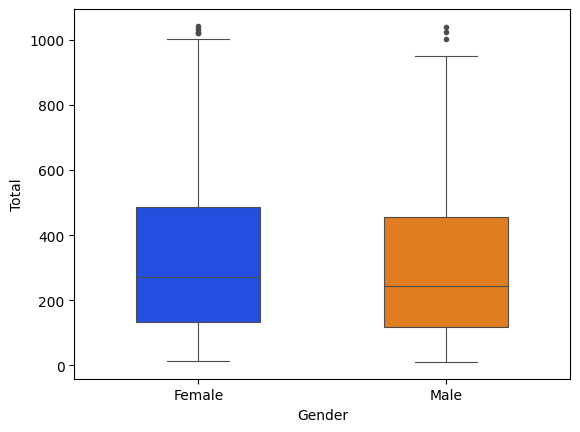

In [1277]:
sns.boxplot( x=data["Gender"], y=data['Total'],
            palette="bright",
            linewidth=0.8,
            width=0.5,
            fliersize=3,
            flierprops={"marker": "o"})

In [1278]:
print(male_data.describe())

       Unit price    Quantity      Tax 5%        Total        cogs  \
count  499.000000  499.000000  499.000000   499.000000  499.000000   
mean    56.081944    5.292585   14.799487   310.789226  295.989739   
std     25.794145    2.947084   11.524844   242.021730  230.496886   
min     10.080000    1.000000    0.508500    10.678500   10.170000   
25%     33.825000    3.000000    5.616500   117.946500  112.330000   
50%     56.500000    5.000000   11.630000   244.230000  232.600000   
75%     76.670000    8.000000   21.754000   456.834000  435.080000   
max     99.960000   10.000000   49.490000  1039.290000  989.800000   

       gross margin percentage  gross income      Rating  
count               499.000000    499.000000  499.000000  
mean                  4.761905     14.799487    6.980962  
std                   0.000000     11.524844    1.682146  
min                   4.761905      0.508500    4.000000  
25%                   4.761905      5.616500    5.600000  
50%            

In [1279]:
male_data["Total"].sum()

155083.824

In [1280]:
print(female_data.describe())

       Unit price    Quantity      Tax 5%        Total        cogs  \
count  501.000000  501.000000  501.000000   501.000000  501.000000   
mean    55.263952    5.726547   15.956936   335.095659  319.138723   
std     27.194037    2.886360   11.872591   249.324401  237.451811   
min     10.160000    1.000000    0.604500    12.694500   12.090000   
25%     30.620000    3.000000    6.322000   132.762000  126.440000   
50%     54.070000    6.000000   12.980000   272.580000  259.600000   
75%     78.880000    8.000000   23.164000   486.444000  463.280000   
max     99.730000   10.000000   49.650000  1042.650000  993.000000   

       gross margin percentage  gross income      Rating  
count               501.000000    501.000000  501.000000  
mean                  4.761905     15.956936    6.964471  
std                   0.000000     11.872591    1.755761  
min                   4.761905      0.604500    4.000000  
25%                   4.761905      6.322000    5.400000  
50%            

In [1281]:
female_data["Total"].sum()

167882.925

rating 

In [1282]:
A=data[data['Branch']=="A"]
A['Rating'].describe()

count    340.000000
mean       7.027059
std        1.731345
min        4.000000
25%        5.600000
50%        7.100000
75%        8.500000
max       10.000000
Name: Rating, dtype: float64

In [1283]:
A['Quantity'].sum()

1859

In [1284]:
B=data[data['Branch']=="B"]
B['Rating'].describe()

count    332.000000
mean       6.818072
std        1.713719
min        4.000000
25%        5.300000
50%        6.700000
75%        8.200000
max       10.000000
Name: Rating, dtype: float64

In [1285]:
B['Quantity'].sum()

1820

In [1286]:
C=data[data['Branch']=="C"]
C['Rating'].describe()

count    328.000000
mean       7.072866
std        1.704526
min        4.000000
25%        5.600000
50%        7.100000
75%        8.500000
max       10.000000
Name: Rating, dtype: float64

In [1287]:
C['Quantity'].sum()

1831

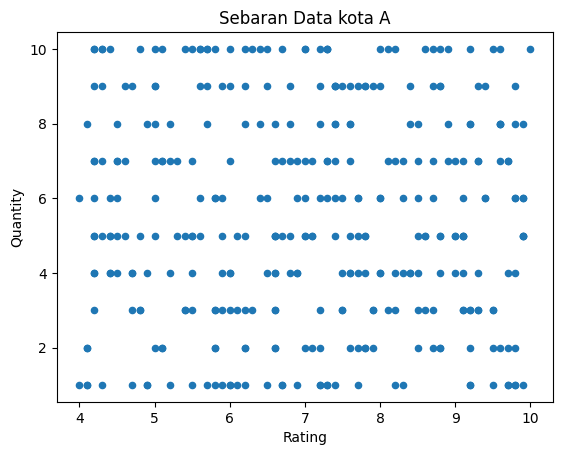

            Rating  Quantity
Rating    1.000000 -0.015909
Quantity -0.015909  1.000000


In [1288]:
# membuat sebaran data
A.plot.scatter(x='Rating', y='Quantity', title='Sebaran Data kota A')
plt.show()
korelasi = A[['Rating','Quantity']].corr(method='kendall')
print(korelasi)

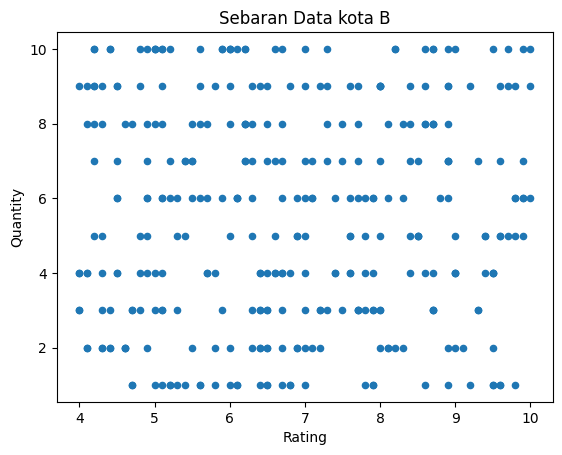

            Rating  Quantity
Rating    1.000000  0.004792
Quantity  0.004792  1.000000


In [1289]:
# membuat sebaran data
B.plot.scatter(x='Rating', y='Quantity', title='Sebaran Data kota B')
plt.show()
korelasi = B[['Rating','Quantity']].corr(method='kendall')
print(korelasi)

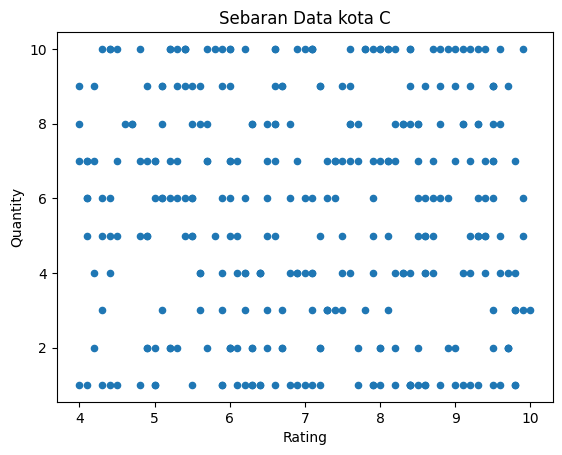

            Rating  Quantity
Rating    1.000000 -0.023955
Quantity -0.023955  1.000000


In [1290]:
# membuat sebaran data
C.plot.scatter(x='Rating', y='Quantity', title='Sebaran Data kota C')
plt.show()
korelasi = C[['Rating','Quantity']].corr(method='kendall')
print(korelasi)

berdasarkan pendapatan produk 

In [1291]:
a=data[data['Product line']=="Electronic accessories"]
b=data[data['Product line']=="Fashion accessories"]
c=data[data['Product line']=="Food and beverages"]
d=data[data['Product line']=="Health and beauty"]
e=data[data['Product line']=="Home and lifestyle"]
f=data[data['Product line']=="Sports and travel"]

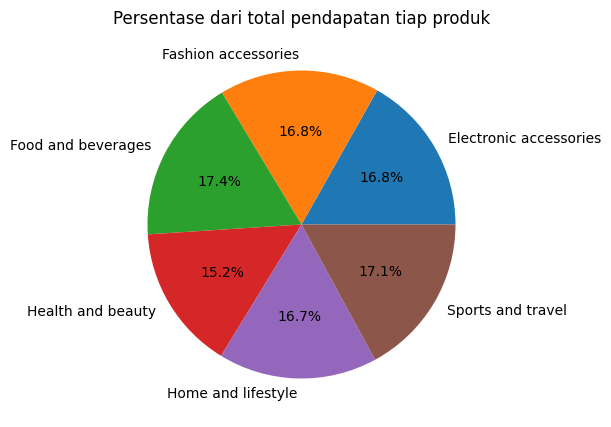

In [1292]:
pie1=[a.Total.sum(),b.Total.sum(),c.Total.sum(),d.Total.sum(),e.Total.sum(),f.Total.sum()]
labels=["Electronic accessories","Fashion accessories","Food and beverages","Health and beauty","Home and lifestyle","Sports and travel"]
plt.figure(figsize=(10,5))
# membuat pie chart
plt.pie(pie1, labels=labels,autopct = '%1.1f%%')

# menambahkan judul
plt.title('Persentase dari total pendapatan tiap produk')

# menampilkan chart
plt.show()

In [1293]:
pie1 

[54337.53150000001,
 54305.895000000004,
 56144.844000000005,
 49193.739,
 53861.913,
 55122.82650000001]

In [1294]:
jumlah=0
for i in range(0,6):
    jumlah += pie1[i]
print(jumlah)

322966.749


In [1295]:
df = pd.read_csv(data_path, parse_dates=["Date"])
df.set_index("Date", inplace=True)
# Menghitung penghasilan perbulan
penghasilan_perbulan = df["Total"].resample("7D").sum()

print(penghasilan_perbulan)


Date
2019-01-01    20377.6335
2019-01-08    25593.5715
2019-01-15    27118.8435
2019-01-22    31894.4955
2019-01-29    25800.2325
2019-02-05    29204.4900
2019-02-12    22517.4705
2019-02-19    20639.8710
2019-02-26    28306.9185
2019-03-05    27485.6505
2019-03-12    22321.8030
2019-03-19    26100.7320
2019-03-26    15605.0370
Freq: 7D, Name: Total, dtype: float64


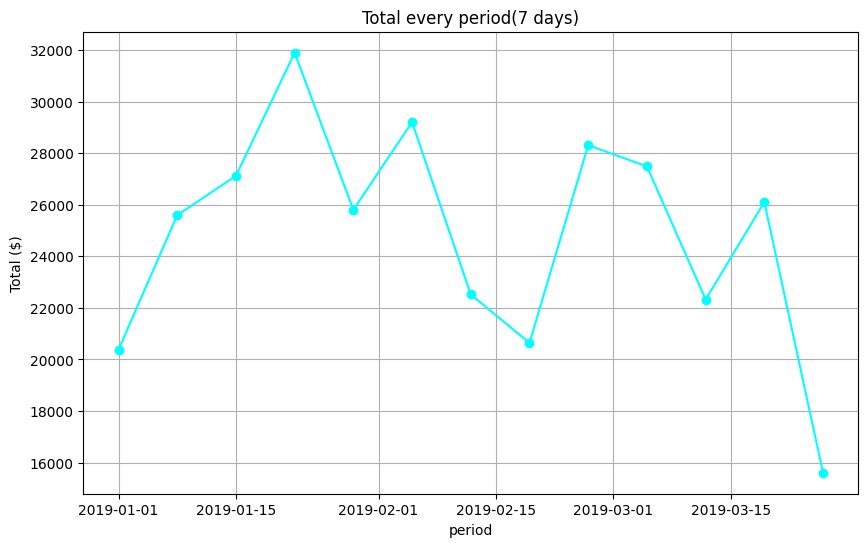

In [1296]:
plt.figure(figsize=(10,6))
plt.plot(penghasilan_perbulan, color = 'cyan', marker = 'o')
plt.title('Total every period(7 days)')
plt.xlabel('period')
plt.ylabel('Total ($)')
plt.grid(True)
plt.show()


In [1297]:
penghasilan_perbulan.describe()

count       13.000000
mean     24843.596077
std       4384.440204
min      15605.037000
25%      22321.803000
50%      25800.232500
75%      27485.650500
max      31894.495500
Name: Total, dtype: float64

In [1298]:
data_member=data[data["Customer type"]=='Member']
data_nonmember=data[data["Customer type"]=='Normal']

In [1299]:
data_member.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,56.206986,5.558882,15.609110,327.791305,312.182196,4.761905,15.609110,6.940319
std,26.739386,2.961592,11.809228,247.993782,236.184554,0.000000,11.809228,1.749380
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000
25%,32.250000,3.000000,5.631000,118.251000,112.620000,4.761905,5.631000,5.400000
50%,56.040000,5.000000,12.668000,266.028000,253.360000,4.761905,12.668000,7.000000
75%,79.930000,8.000000,23.122500,485.572500,462.450000,4.761905,23.122500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000


In [1300]:
data_member['Total'].sum()

164223.44400000002

In [1301]:
data_nonmember['Total'].sum()

158743.305

In [1302]:
data_nonmember.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,55.135130,5.460922,15.148707,318.122856,302.974148,4.761905,15.148707,7.005210
std,26.262452,2.886747,11.614419,243.902800,232.288381,0.000000,11.614419,1.688222
min,10.560000,1.000000,0.604500,12.694500,12.090000,4.761905,0.604500,4.000000
25%,33.230000,3.000000,6.154000,129.234000,123.080000,4.761905,6.154000,5.700000
50%,54.280000,5.000000,11.306000,237.426000,226.120000,4.761905,11.306000,7.000000
75%,76.460000,8.000000,22.029000,462.609000,440.580000,4.761905,22.029000,8.400000
max,99.960000,10.000000,49.490000,1039.290000,989.800000,4.761905,49.490000,10.000000


<AxesSubplot: xlabel='Customer type', ylabel='Total'>

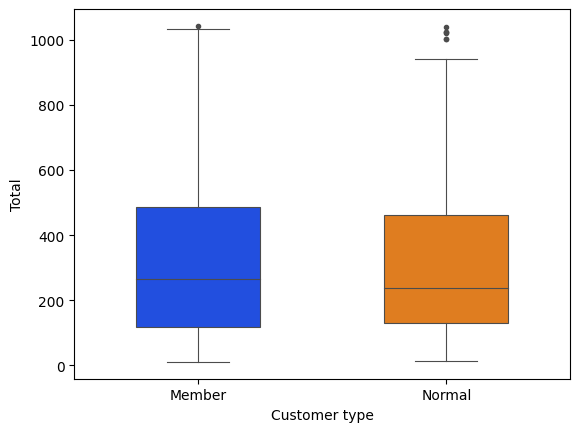

In [1303]:
sns.boxplot( x=data["Customer type"], y=data['Total'],
            palette="bright",
            linewidth=0.8,
            width=0.5,
            fliersize=3,
            flierprops={"marker": "o"})